In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.getcwd()+'/Desktop/USC/s2/DSO562/project1/'

In [3]:
data = pd.read_csv(path+'data_pca.csv')

In [4]:
data = data.iloc[:,1:]

In [5]:
from sklearn import preprocessing

In [6]:
scaler  = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)

In [7]:
type(data)

numpy.ndarray

In [8]:
for var,mean in enumerate([data[:,i].mean() for i in range(10)]):
    print ('variable {}\'s mean is {:.2f}'.format(var,mean) )

variable 0's mean is 0.00
variable 1's mean is -0.00
variable 2's mean is -0.00
variable 3's mean is 0.00
variable 4's mean is -0.00
variable 5's mean is 0.00
variable 6's mean is -0.00
variable 7's mean is -0.00
variable 8's mean is -0.00
variable 9's mean is 0.00


In [13]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [21]:
from sklearn.model_selection import train_test_split
seed = 46
data_train, data_test = train_test_split(data, test_size=0.2, random_state=seed)

In [22]:
data_train.shape

(838860, 10)

In [23]:
data_test.shape

(209715, 10)

In [24]:
input_dim =data_train.shape[1]
encoding_dim = int(input_dim/2)

In [25]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [29]:
nb_epoch = 50
batch_size = 500
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
history = autoencoder.fit(data_train, data_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(data_test, data_test),
                    verbose=1)

Train on 838860 samples, validate on 209715 samples
Epoch 1/50
838860/838860 [==============================] - 5s - loss: 0.7512 - acc: 0.5579 - val_loss: 0.6800 - val_acc: 0.5592
Epoch 2/50
838860/838860 [==============================] - 5s - loss: 0.7464 - acc: 0.5585 - val_loss: 0.6766 - val_acc: 0.5616
Epoch 3/50
838860/838860 [==============================] - 5s - loss: 0.7444 - acc: 0.5582 - val_loss: 0.6769 - val_acc: 0.5590
Epoch 4/50
838860/838860 [==============================] - 4s - loss: 0.7442 - acc: 0.5570 - val_loss: 0.6743 - val_acc: 0.5590
Epoch 5/50
838860/838860 [==============================] - 5s - loss: 0.7405 - acc: 0.5583 - val_loss: 0.6732 - val_acc: 0.5590
Epoch 6/50
838860/838860 [==============================] - 6s - loss: 0.7401 - acc: 0.5580 - val_loss: 0.6727 - val_acc: 0.5590
Epoch 7/50
838860/838860 [==============================] - 5s - loss: 0.7394 - acc: 0.5583 - val_loss: 0.6727 - val_acc: 0.5589
Epoch 8/50
838860/838860 [===================

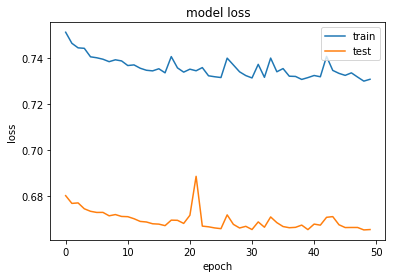

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
predictions = autoencoder.predict(data)

In [35]:
mse = np.mean(np.power(data - predictions, 2), axis=1)

In [36]:
mse

array([0.27023937, 0.06400142, 0.30289885, ..., 1.66435044, 0.17100302,
       0.11059602])

In [40]:
len(mse)

1048575

In [48]:
np.vstack((mse,np.arange(1048575)))

array([[2.70239373e-01, 6.40014211e-02, 3.02898848e-01, ...,
        1.66435044e+00, 1.71003025e-01, 1.10596021e-01],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        1.04857200e+06, 1.04857300e+06, 1.04857400e+06]])

In [52]:
mse_sort = sorted(zip(mse,np.arange(1048575)))

In [54]:
mse_sort[-10:]

[(3536.4955676714126, 28608),
 (3538.8340897336775, 81045),
 (3538.8340897336775, 97788),
 (3538.8340897336775, 210764),
 (3538.8340897336775, 262368),
 (3538.8340897336775, 815071),
 (3538.8340897336775, 846614),
 (5036.072313574934, 246250),
 (5036.072313574934, 508285),
 (37490.517606404515, 22920)]

In [75]:
this_list = [e2 for e1,e2 in mse_sort[-10:]]

In [55]:
another_list = [ 22920,  28608,  81045,  97788, 210764, 246250, 262368, 456014, 508285, 815071, 846614]

In [76]:
this_list

[28608, 81045, 97788, 210764, 262368, 815071, 846614, 246250, 508285, 22920]

In [62]:
len(set(this_list) & set(another_list))

10

In [63]:
that_list = [22920, 246250, 508285, 81045, 97788, 210764, 262368, 815071, 846614, 456014]

In [80]:
set(this_list) ^ set(that_list)

{28608, 456014}

In [81]:
[e2 for e1,e2 in mse_sort[-20:]]

[720621,
 808266,
 828889,
 830419,
 837496,
 876350,
 970851,
 1007689,
 545595,
 456014,
 28608,
 81045,
 97788,
 210764,
 262368,
 815071,
 846614,
 246250,
 508285,
 22920]

In [89]:
df = pd.DataFrame(mse_sort,columns=['MSE','RECORD'])

In [90]:
df = df.iloc[:,[1,0]]

In [92]:
df.tail()

,RECORD,MSE
1048570,815071,3538.834090
1048571,846614,3538.834090
1048572,246250,5036.072314
1048573,508285,5036.072314
1048574,22920,37490.517606


In [93]:
df.to_csv(path+'autoencoder_error_score.csv')